In [5]:
# %pip install numpy matplotlib scipy sklearn libsvm pandas seaborn

In [1]:
# Load Library
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
import sklearn
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline
random.seed(1)

In [2]:
# Load Train Data
Data = pd.read_csv("Data/Raw/train.csv")
Data['Neighbourhood'] = Data['Neighbourhood'].astype(str)
Y = Data['Decision']
X = Data.drop(['Decision'], axis=1)
# Load Test Data
Test = pd.read_csv("Data/Raw/test.csv")
Test['Neighbourhood'] = Test['Neighbourhood'].astype(str)

In [3]:
Data['Decision'].value_counts()

1    4735
0    2736
Name: Decision, dtype: int64

In [5]:
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['Room_type', 'Month','Neighbourhood'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

X_data = Encode(X.copy())
Test_data = Encode(Test.copy())

In [6]:
# Split Data: 20% Test, 80% Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,Y, test_size=0.2, random_state= 1)

# Base Model

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score

# instantiate classifier with default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model f1 score with default hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model f1 score with default hyperparameters: 0.7742


# Run SVM with rbf kernel and different C value


In [8]:
svc=SVC(C=100.0)  #SVM Default is kernel='rbf'

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model f1 score with C=100 and rbf kernel hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model f1 score with C=100 and rbf kernel hyperparameters: 0.7811


In [9]:
accuracy_score(y_test, y_pred)

0.6622073578595318

In [10]:
svc=SVC(C=1000)  #SVM Default is kernel='rbf'

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model f1 score with C=1000 and rbf kernel hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model f1 score with C=1000 and rbf kernel hyperparameters: 0.7892


In [11]:
accuracy_score(y_test, y_pred)

0.6809364548494983

In [12]:
svc=SVC(C=10000)  #SVM Default is kernel='rbf'

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model f1 score with C=10000 and rbf kernel hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model f1 score with C=10000 and rbf kernel hyperparameters: 0.7916


In [13]:
accuracy_score(y_test, y_pred)

0.6882943143812709

In [31]:
svc=SVC(C=100000)  #SVM Default is kernel='rbf'

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model f1 score with C=100000 and rbf kernel hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model f1 score with C=100000 and rbf kernel hyperparameters: 0.7908


In [15]:
accuracy_score(y_test, y_pred)

0.6903010033444816

In [32]:
prediction = svc.predict(Test_data)
submission = pd.read_csv("Submission/sample_submission.csv")
submission["Decision"] = prediction
pd.DataFrame(submission).to_csv("linear_SVC_Take_2.csv")

In [33]:
submission["Decision"].value_counts()

1    2030
0     410
Name: Decision, dtype: int64

# Run SVM with linear kernel and C=100.0

In [18]:
svc=SVC(C=100, kernel = 'linear')  #SVM Default is kernel='rbf'

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model f1 score with C=100 and linear kernel hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Model f1 score with C=100 and linear kernel hyperparameters: 0.7535


In [24]:
train_pred=svc.predict(X_train)
print('Model f1 score with C=100 and linear kernel hyperparameters: {0:0.4f} on train data'. format(f1_score(y_train, train_pred)))
print('Model accuracy_score score with C=100 and linear kernel hyperparameters: {0:0.4f} on train data'. format(accuracy_score(y_train, train_pred)))

test_pred=svc.predict(X_test)
print('Model f1 score with C=100 and linear kernel hyperparameters: {0:0.4f} on test data'. format(f1_score(y_test, test_pred)))
print('Model accuracy_score score with C=100 and linear kernel hyperparameters: {0:0.4f} on train data'. format(accuracy_score(y_test, test_pred)))


Model f1 score with C=100 and linear kernel hyperparameters: 0.7709 on train data
Model accuracy_score score with C=100 and linear kernel hyperparameters: 0.6714 on train data
Model f1 score with C=100 and linear kernel hyperparameters: 0.7535 on test data
Model accuracy_score score with C=100 and linear kernel hyperparameters: 0.6455 on train data


In [30]:
prediction = svc.predict(Test_data)
submission = pd.read_csv("Submission/sample_submission.csv")
submission["Decision"] = prediction
pd.DataFrame(submission).to_csv("linear_SVC_Take_1.csv")

## Because we see extremely high false negative rate, we will rescale the dataframe 

In [24]:
from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)

## Optimization Using GridSearchCV:

In [26]:
import libsvm

from libsvm.svmutil import *

In [34]:
kernel_type = [0,1,2,3]
prob = svm_problem(y_train.to_numpy(),X_train)
for id, C_val in enumerate(kernel_type):
    param = svm_parameter()
    param.kernel_type = C_val
    model = svm_train(prob,param)
    p_label,p_acc,p_val = svm_predict(y_test.to_numpy(), X_test.to_numpy(), model)
    print(C_val, p_acc)

Accuracy = 64.7492% (968/1495) (classification)
0 (64.74916387959865, 0.35250836120401335, 0.02161153715453269)
Accuracy = 56.3211% (842/1495) (classification)
1 (56.32107023411371, 0.4367892976588629, 0.0017361030327314511)
Accuracy = 76.5886% (1145/1495) (classification)
2 (76.58862876254182, 0.23411371237458195, 0.2307799110242381)
Accuracy = 63.3445% (947/1495) (classification)
3 (63.34448160535116, 0.3665551839464883, nan)


ValueError: Wrong input format: first column must be 0:sample_serial_number

/Users/yuchenlu/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


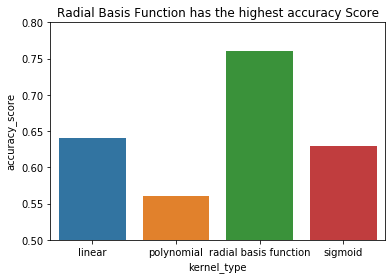

In [22]:
plt.xlabel('kernel_type')
plt.ylabel('accuracy_score')
plt.ylim(0.5,0.8)
plt.title("Radial Basis Function has the highest accuracy Score")
sns.barplot(['linear','polynomial','radial basis function','sigmoid'], [0.64,0.56,0.76,0.63])

We have the highest Accuracy score at 76.5886% (1145/1495) with kernel type 2, which is rbf(radial basis function). Which is uses the function exp(-gamma*|u-v|^2). Therefore, we will continue to optimize the gamma and svm value.

In [39]:
svm_type = [0,1,2]
prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
for id_val, C_val in enumerate(svm_type):
    param = svm_parameter()
    param.kernel_type = 2
    param.svm_type = C_val
    model = svm_train(prob,param)
    p_label,p_acc,p_val = svm_predict(y_test.to_numpy(), X_test.to_numpy(), model)
    print(C_val, p_acc)

Accuracy = 76.5886% (1145/1495) (classification)
0 (76.58862876254182, 0.23411371237458195, 0.2307799110242381)
Accuracy = 77.3913% (1157/1495) (classification)
1 (77.39130434782608, 0.22608695652173913, 0.24647040234171502)
Accuracy = 4.21405% (63/1495) (classification)
2 (4.214046822742475, 2.731772575250836, 0.03729548930683516)


/Users/yuchenlu/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


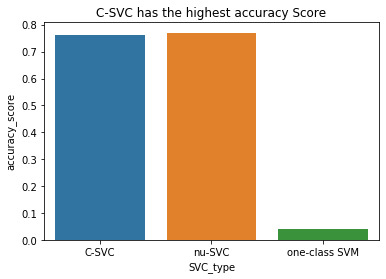

In [25]:
plt.xlabel('SVC_type')
plt.ylabel('accuracy_score')
plt.title("C-SVC has the highest accuracy Score")
sns.barplot(['C-SVC','nu-SVC','one-class SVM'], [0.76,0.77,0.042])

In the classification type(svm_type 0;1;2), I observe the highest accuracy score with svm_type 0, which is C-SVC. We then try to optimize the gamma value with the following parameter:
* kernel_type = 2; svm_type = 0

In [43]:
gamma = np.arange(0,1,0.1)
prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
for id_gamma, C_val in enumerate(gamma):
    param = svm_parameter()
    param.kernel_type = 2
    param.svm_type = 0
    param.gamma = C_val
    model = svm_train(prob,param)
    p_label,p_acc,p_val = svm_predict(y_test.to_numpy(), X_test.to_numpy(), model)
    print(C_val, p_acc)

Accuracy = 76.5886% (1145/1495) (classification)
0.0 (76.58862876254182, 0.23411371237458195, 0.2307799110242381)
Accuracy = 76.9231% (1150/1495) (classification)
0.1 (76.92307692307693, 0.23076923076923078, 0.24314639806006702)
Accuracy = 76.1873% (1139/1495) (classification)
0.2 (76.18729096989966, 0.23812709030100335, 0.23974637703097157)
Accuracy = 74.0468% (1107/1495) (classification)
0.30000000000000004 (74.04682274247492, 0.25953177257525084, 0.1951692351837826)
Accuracy = 73.311% (1096/1495) (classification)
0.4 (73.31103678929766, 0.26688963210702343, 0.18016216615336267)
Accuracy = 72.709% (1087/1495) (classification)
0.5 (72.70903010033445, 0.2729096989966555, 0.1700531644924858)
Accuracy = 71.7057% (1072/1495) (classification)
0.6000000000000001 (71.70568561872909, 0.282943143812709, 0.1491636783154792)
Accuracy = 71.7057% (1072/1495) (classification)
0.7000000000000001 (71.70568561872909, 0.282943143812709, 0.1500965989653805)
Accuracy = 71.505% (1069/1495) (classification

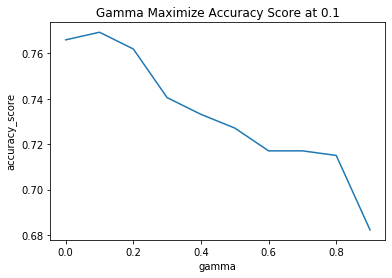

In [32]:
gamma = np.arange(0,1,0.1)
acc = [0.765886,0.769231,0.761873,0.740468, 0.73311,0.72709,0.717057,0.717057,0.71505, 0.682274]
plt.xlabel('gamma')
plt.ylabel('accuracy_score')
plt.title("Gamma Maximize Accuracy Score at 0.1")
plt.plot(gamma, acc)

The highest accuracy score given is 0.25. 
The finalized optimized data is:
* gamma = 0.1; kernel_type = 2; svm_type = 0

In [45]:
prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
param = svm_parameter()
param.gamma = 0.2
param.svm_type = 1
param.kernel_type = 2
model = svm_train(prob,param)
p_label,p_acc,p_val = svm_predict(y_test.to_numpy(), X_test.to_numpy(), model)
# p_label,p_acc,p_val = svm_predict(y_train.to_numpy(), X_train.to_numpy(), model)

Accuracy = 77.9933% (1166/1495) (classification)


In [48]:
confusion_matrix(y_test,p_label)

array([[253, 295],
       [ 34, 913]])

The model is overfitting the train data. We will add regularization parameter.For svm_type of nu_svc. We will tune the following hyperparameter
* -n nu : set the parameter nu of nu-SVC, one-class SVM, and nu-SVR (default 0.5)

In [167]:
nu = np.arange(0.1,0.7,0.1)
prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
for id_val, nu_val in enumerate(nu):
    prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
    param = svm_parameter()
    param.nu = nu_val
    param.gamma = 0.2
    param.svm_type = 1
    param.kernel_type = 2
    model = svm_train(prob,param)
    p_label,p_acc,p_val = svm_predict(y_test.to_numpy(), X_test.to_numpy(), model)

Accuracy = 78.0602% (1167/1495) (classification)
Accuracy = 78.1271% (1168/1495) (classification)
Accuracy = 78.0602% (1167/1495) (classification)
Accuracy = 78.1271% (1168/1495) (classification)
Accuracy = 77.9933% (1166/1495) (classification)
Accuracy = 77.592% (1160/1495) (classification)


In [197]:
prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
param = svm_parameter()
param.nu = 0.4
param.gamma = 0.2
param.svm_type = 1
param.kernel_type = 2
model = svm_train(prob,param)
p_label,p_acc,p_val = svm_predict(y_test.to_numpy(), X_test.to_numpy(), model)
pd.DataFrame(p_label).value_counts()

Accuracy = 78.1271% (1168/1495) (classification)


1.0    1204
0.0     291
dtype: int64

The accuracy score maximize when nu is set at 0.1 or 0.4.

For svm_type of C_svc. We will tune the following hyperparameter:
* -c cost : set the parameter C of C-SVC, epsilon-SVR, and nu-SVR (default 1)
* -wi weight: set the parameter C of class i to weight*C, for C-SVC (default 1)

In [187]:
C = np.arange(1,100,10)
prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
for id_val, C_val in enumerate(C):
    prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
    param = svm_parameter()
    # param.cache_size = 40
    # param.eps = 0.01
    param.C = C_val
    # param.nr_weight = 10
    # param.shrinking = 1
    param.gamma = 0.1
    param.svm_type = 0
    param.kernel_type = 2
    model = svm_train(prob,param)
    p_label,p_acc,p_val = svm_predict(y_test.to_numpy(), X_test.to_numpy(), model)
# Cost is maximize from 20

Accuracy = 76.9231% (1150/1495) (classification)
Accuracy = 76.9231% (1150/1495) (classification)
Accuracy = 76.99% (1151/1495) (classification)
Accuracy = 76.99% (1151/1495) (classification)
Accuracy = 76.99% (1151/1495) (classification)
Accuracy = 76.99% (1151/1495) (classification)
Accuracy = 76.99% (1151/1495) (classification)
Accuracy = 76.99% (1151/1495) (classification)
Accuracy = 76.9231% (1150/1495) (classification)
Accuracy = 76.9231% (1150/1495) (classification)


In [ ]:
eps = np.arange(0.01,0.1,0.01)
prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
for id_val, C_val in enumerate(C):
    prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
    param = svm_parameter()
    # param.cache_size = 40
    # param.eps = 0.01
    param.C = C_val
    # param.nr_weight = 10
    # param.shrinking = 1
    param.gamma = 0.1
    param.svm_type = 0
    param.kernel_type = 2
    model = svm_train(prob,param)
    p_label,p_acc,p_val = svm_predict(y_test.to_numpy(), X_test.to_numpy(), model)
# Cost is maximize from 20

In [49]:
prob = svm_problem(y_train.to_numpy(),X_train.to_numpy())
param = svm_parameter('-w0 50 -w1 1 -g 0.1 -s 0 -t 2')
# param.cache_size = 20
# param.eps = 0.01
# param.C = 10
# param.nr_weight = 10
# param.shrinking = 1
# param.gamma = 0.1
# param.svm_type = 0
# param.kernel_type = 2
model = svm_train(prob,param)
p_label,p_acc,p_val = svm_predict(y_test.to_numpy(), X_test.to_numpy(), model)

Accuracy = 77.6589% (1161/1495) (classification)


In [50]:
confusion_matrix(y_test,p_label)

array([[320, 228],
       [106, 841]])

In [ ]:
pd.DataFrame(y_test)

# Save Submission

In [51]:
submission = pd.read_csv("Submission/sample_submission.csv")
p_label,p_acc,p_val  = svm_predict(submission["Decision"].to_numpy(), Test_data.to_numpy(),model)

Accuracy = 13.1967% (322/2440) (classification)


In [56]:
prediction = p_label
submission["Decision"] = prediction
pd.DataFrame(submission).to_csv("Optimized_SVC_C.csv",index=False)

In [57]:
submission["Decision"].value_counts()

1.0    2118
0.0     322
Name: Decision, dtype: int64